<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data (breast-cancer-wisconsin-data-old.csv)
- Perform some basic structural cleaning to facilitate the work

In [313]:
# Import libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.tree import plot_tree
from sklearn import tree
import pydotplus


import matplotlib.gridspec as gridspec
%matplotlib inline

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [314]:
col_names = ['code', 'clump_thickness' , 'uniformity_cell_size' , 'uniformity_cell_shape' , 'marginal_adhesion' , 'single_epithelial_cell_size' , 'bare_nuclei' , 'bland_chromatin' , 'normal_nucleoli' , 'mitoses' , 'class']
df = pd.read_csv("breast-cancer-wisconsin-data-old.csv", header=None, names=col_names)

In [315]:
df

,code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
code                           699 non-null int64
clump_thickness                699 non-null int64
uniformity_cell_size           699 non-null int64
uniformity_cell_shape          699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null object
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [317]:
df.isnull().sum()

code                           0
clump_thickness                0
uniformity_cell_size           0
uniformity_cell_shape          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [318]:
df['bare_nuclei'] = df['bare_nuclei'].replace('?', np.nan)

In [319]:
df['bare_nuclei'] =df['bare_nuclei'].fillna(0)

In [320]:
df['bare_nuclei'] = df['bare_nuclei'].astype(int)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
code                           699 non-null int64
clump_thickness                699 non-null int64
uniformity_cell_size           699 non-null int64
uniformity_cell_shape          699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null int32
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.5 KB


In [322]:
df['bare_nuclei']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nuclei, Length: 699, dtype: int32

In [323]:
df[['code', 'bare_nuclei']][df['bare_nuclei'] == '?']

C:\Users\65911\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,code,bare_nuclei


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
code                           699 non-null int64
clump_thickness                699 non-null int64
uniformity_cell_size           699 non-null int64
uniformity_cell_shape          699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null int32
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.5 KB


In [325]:
df['class'].unique()

array([2, 4], dtype=int64)

In [326]:
df['class'] = df['class'].replace([2,4], [0,1])
df['class'].unique()

array([0, 1], dtype=int64)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [327]:
df.describe()

,code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [328]:
df.shape

(699, 11)

In [329]:
df

,code,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


In [330]:
#split dataset in features and target variable
feature_cols = ['clump_thickness' , 'uniformity_cell_size' , 'uniformity_cell_shape' , 'marginal_adhesion' , 'single_epithelial_cell_size' , 'bare_nuclei' , 'bland_chromatin' , 'normal_nucleoli' , 'mitoses']
X = df[feature_cols] # Features
y = df['class'] # Target variable

In [331]:
X.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [332]:
y.unique()

array([0, 1], dtype=int64)

In [333]:
y.value_counts()

0    458
1    241
Name: class, dtype: int64

In [334]:
y.sample(5)

472    0
682    0
161    0
163    0
478    0
Name: class, dtype: int64

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? 
Clump_Thickness, Uniformity_of_Cell_Size, Uniformity_of_Cell_Shape, Marginal_Adhesion, Single_Epithelial_Cell_Size, Bare_Nuclei, Bland_Chromatin, Normal_Nucleoli, Mitoses
- Is there an output variable (label)? Yes
- If there is an output variable:
    - What is it? 
    - What is its type? 
- What type of Modelling is it?
    - [X] Supervised <-- this one
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [X] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1000)

In [336]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [337]:
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (489, 9)
X_test shape : (210, 9)
y_train shape : (489,)
y_test shape : (210,)


# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

(i) Use Decision Tree as base classifier with KFold CV k = 10
(ii) Use Bagging with KFold CV k = 10

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [338]:
kfold = KFold(n_splits = 10, random_state = 7, shuffle=True)
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
results = cross_val_score(cart, X_train, y_train, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

# parameters = {
#     'criterion' : ['ginish', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2, 10, 1),
#     'splitter' : ['best', 'random']
# }



Decision Tree, Cross-Validation mean: 0.9551


### Bagging

In [339]:
num_trees = 150
model1 = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = 7)
model1.fit(X_train, y_train)
results = cross_val_score(model1, X_train, y_train, cv = kfold)
print('Bagging, Cross-Validation mean: %.4f' % results.mean())

Bagging, Cross-Validation mean: 0.9673


# Testing for Kfold value

In [340]:
num_trees_list = [x for x in range(5,100+1,5)]

In [341]:
def print_graph(num_trees_list, means):
    plt.plot(num_trees_list, means)
    plt.xlabel('Number of trees')
    plt.ylabel('Cross-Validation')
    plt.show()

In [342]:
def print_max_accuracy(num_trees_list, means):
    max_index = means.index(max(means))
    zipped_list = list(zip(num_trees_list, means))
    print(f"Number of trees: {zipped_list[max_index][0]} -> Accuracy CV: {zipped_list[max_index][1]}")

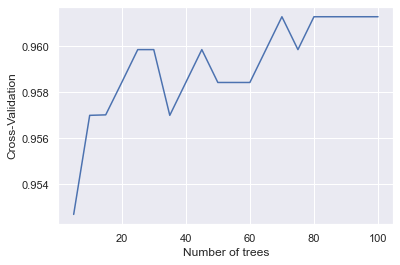

Number of trees: 70 -> Accuracy CV: 0.9612836438923396


In [343]:
from sklearn.model_selection import KFold

seed = 1
kfold = KFold(n_splits=10, random_state=seed, shuffle = True)

cart1 = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)

means = []
for num_trees in num_trees_list:
    #Initialising model for bagging
    model_k = BaggingClassifier(base_estimator=cart1, n_estimators=num_trees, random_state=seed, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1)
    results = cross_val_score(model_k, X, y, cv=kfold)
    means.append(results.mean())
    
print_graph(num_trees_list, means)
print_max_accuracy(num_trees_list, means)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [344]:
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities[:, 1])

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

*****************
* Decision Tree *
*****************
Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


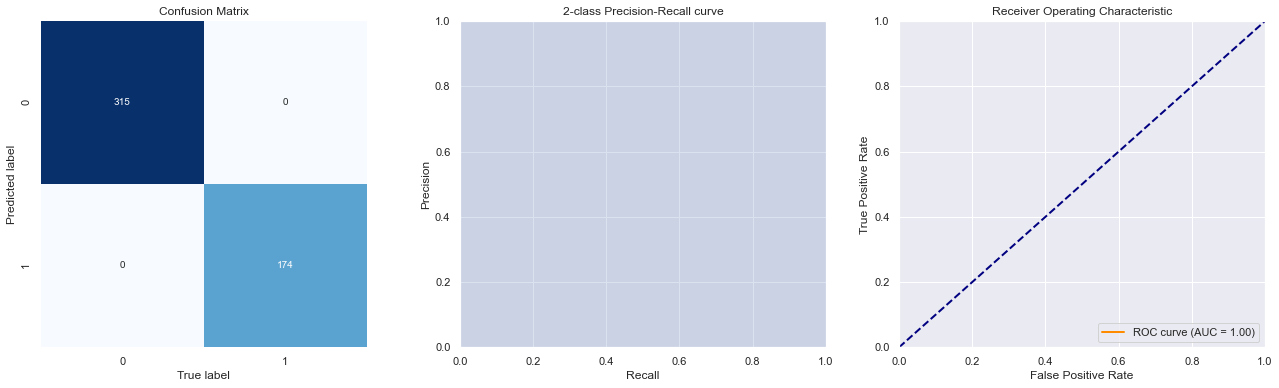


****************
* Bagging (DT) *
****************
Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


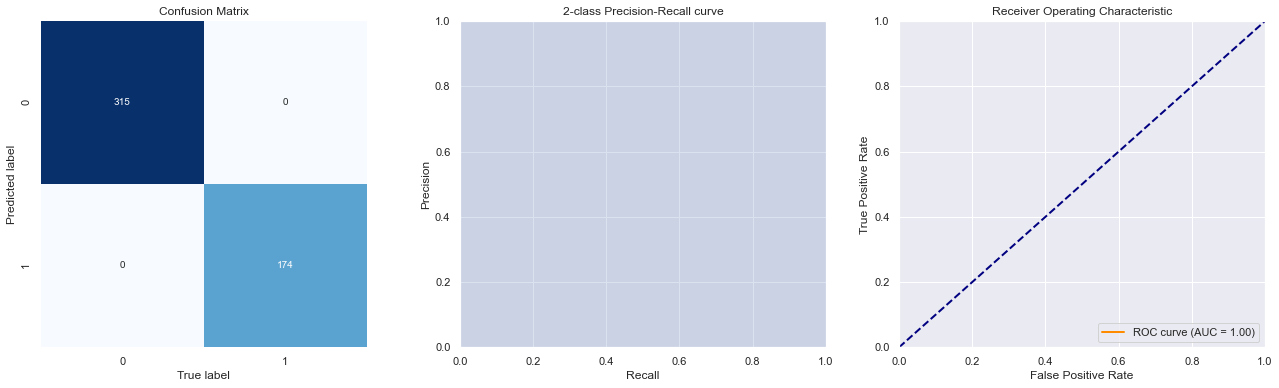

In [345]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'Bagging (DT)']
for i, m in enumerate([cart, model1]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train)

    probabilities = m.predict_proba(X_train)

    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions, probabilities)

    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [346]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Decision Tree,1.0,1.0,1.0,1.0
1,Bagging (DT),1.0,1.0,1.0,1.0


In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

cart = cart.fit(X_train, y_train)
y_train_pred = cart.predict(X_train)
y_test_pred = cart.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

model = model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model_train = accuracy_score(y_train, y_train_pred) 
model_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f' % (model_train, model_test))

Decision tree train/test accuracies 1.000/0.914
Bagging train/test accuracies 1.000/0.936


# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

Accuracy : 0.9357 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8980 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9167 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9668                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


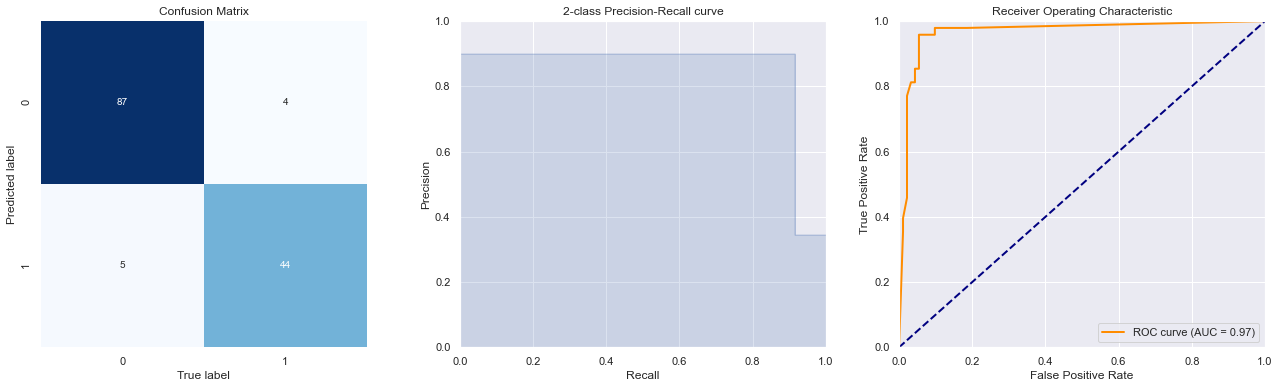

In [348]:
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions, probabilities)
# keep the results
results.loc[len(results)] = {
    'Model': 'Bagging (with test)', 
    'Accuracy': accuracy_, 
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [353]:
r = df.iloc[pd.DataFrame(X_test).index[0]]
for i, c in enumerate(df.columns[:-1]):
    print('%-27s: %d' % (c, int(r[i])))
print('%-27s: %s' % (df.columns[-1], 'Benign' if r[-1] == 2 else 'Malignant'))
print('%-27s: %s' % ('Prediction', 'Benign' if predictions[0] == 0 else 'Malignant'))

code                       : 752904
clump_thickness            : 10
uniformity_cell_size       : 1
uniformity_cell_shape      : 1
marginal_adhesion          : 1
single_epithelial_cell_size: 2
bare_nuclei                : 10
bland_chromatin            : 5
normal_nucleoli            : 4
mitoses                    : 1
class                      : Malignant
Prediction                 : Benign




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



